# Equations for a neutron star

![](./intro.PNG)

![](./eq.cond1.PNG)
![](./eq.cond2.PNG)

## Initial conditions

![](./in_cond.PNG)

## Dimensionless equations

![](./dim0.PNG)
![](./dim2.PNG)
![](./dim2.PNG)

## Parametrization of the mass-energy density

![](./eos.PNG)

### References

1.   Hjorth-Jensen, M. (2010). **Computational Physics**. University of Oslo.

Introducing the dimensionless quantities $\hat{r} = r/R_0$, $\hat{\rho} = \rho/\rho_s$, $\hat{P} = P/\rho_s$ and mass $\hat{m} = m/M_0$, where $M_0$ and $R_0$ are the dimensionless constants, here given in units of solar masses and $10 \ \text{km}$:
\begin{equation}
    R_0 = \frac{1}{\sqrt{4\pi\rho_s G}} = \frac{24.584}{\sqrt{\rho_s}} \ \left[ 10 \ \text{km} \right]\\
    M_0 = \frac{4\pi\rho_s}{\left(\sqrt{4\pi\rho_s G}\right)^{3}} \frac{167.343}{\sqrt{\rho_s}} \ \left[ M_{\odot} \right]
\end{equation}

where $M_{\odot} = 1.989 * 10^{30} \text{Kg} = 1.1157467 * 10^{60} \text{MeV $c^{-2}$}$ is the solar mass.

The non relativistic equations can thus be written as:
\begin{equation}
    \frac{d\hat{P}}{d\hat{r}} = - \frac{\hat{m} \hat{\rho}}{\hat{r}^{2}}\\
    \frac{d\hat{m}}{d\hat{r}} = \hat{r}^{2} \hat{\rho}
\end{equation}

A relativistic expresion for the derivative of the pressure can also be obtained
\begin{equation}
    \frac{d\hat{P}}{d\hat{r}} = - \frac{\left ( \hat{P} + \hat{\rho} \right ) \left ( \hat{r}^{3}\hat{P} + \hat{m} \right )}{\hat{r}^{2} - 2\hat{m}\hat{r}},
\end{equation}

this is known as **Tolman-Oppenheimer-Volkov (TOM)** equation. In this case the pressure itself contributes to the gravitational field.

We need to solve two coupled differential equations. At each step, the mass-energy density is obtained through the Bethe-Johnson parametrization:
\begin{equation}
    P(n) = 363.44 * n^{2.54}\\
    \rho(n) = 236 * n^{2.54} + nm_n
\end{equation}

where $n=N/V$ is the number density of the total number of baryons (N) and $m_n = 938.926 \text{MeV $c^{2}$ $fm^{-3}$}$ is the average mass of the neutron.

At each step, from the actual value of the pressure P is obtained the density n and from the density is then obtained the mass-energy density which is later used to compute the new value of pressure and mass at the next iteration.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def deriv(r, y, rho_s):
    '''
    Non relativistic expression for the derivative
    '''
    P, m = y
    rho = get_rho(P)/rho_s
    return np.array([-m*rho/r**2, rho*r**2])

In [3]:
def deriv_tov(r, y, rho_s):
    '''
    Relativistic expression for the derivative of the pressure
    Tolman-Oppenheimer-Volkov equation
    '''
    P, m = y
    rho = get_rho(P)/rho_s
    return np.array([-(P + rho)*(r**3 * P + m)/(r**2 - 2*m*r), rho*r**2])

In [4]:
def get_rho(P):
    '''
    Computes rho using the Bethe-Johnson parametrization for the mass-energy density
    If the pressure goes to negative values the formula for n is no longer valid,
    we thus set rho to zero to avoid raising an error
    '''
    m_n = 938.926
    if P >= 0:
        n = (P/363.44)**(1/2.54)
        rho = 236*(P/363.44) + n*m_n
    else:
        rho = 0
    return rho

In [5]:
def rk4(t, deriv, y, dt, **kwargs):
    for i in range(len(t)-1):
        k1 = deriv(t[i], y[i][:], **kwargs) * dt
        k2 = deriv(t[i] + dt/2, y[i][:] + k1/2, **kwargs) * dt
        k3 = deriv(t[i] + dt/2, y[i][:] + k2/2,  **kwargs) * dt
        k4 = deriv( t[i], y[i][:] + k3, **kwargs) * dt
        y[i+1][:] = y[i][:] + (k1 + 2*k2 + 2*k3 + k4)/6
    #return y

In [6]:
# Sets rho_s
rho_s = 1000
# Constats to set the dimensions into solar masses and 10 km
R0 = 24.584/np.sqrt(rho_s)
M0 = 167.343/np.sqrt(rho_s)

r0 = 0.01
rf = 70
dr = 0.01
N = int((rf - r0)/dr)

P = np.array([N])
m = np.array([N])
y = np.zeros([N,2])

P_rel = np.array([N])
m_rel = np.array([N])
y2 = np.zeros([N,2])

# Pressure at r=0 is rho_s and the mass at r=0 is zero
y[0][0] = 1
y2[0][0] = 1

r = np.linspace(r0, rf, N)

In [7]:
rk4(r, deriv, y, dr, rho_s=rho_s)

In [8]:
y

array([[ 1.00000000e+00,  0.00000000e+00],
       [ 9.99999470e-01,  1.70167792e-07],
       [ 9.99998710e-01,  6.80794843e-07],
       ...,
       [-1.31856949e-07,  8.80169456e+02],
       [-1.31856949e-07,  8.80169456e+02],
       [-1.31856949e-07,  8.80169456e+02]])

In [9]:
P = y.transpose()[0]
m = y.transpose()[1]

In [10]:
#P,m

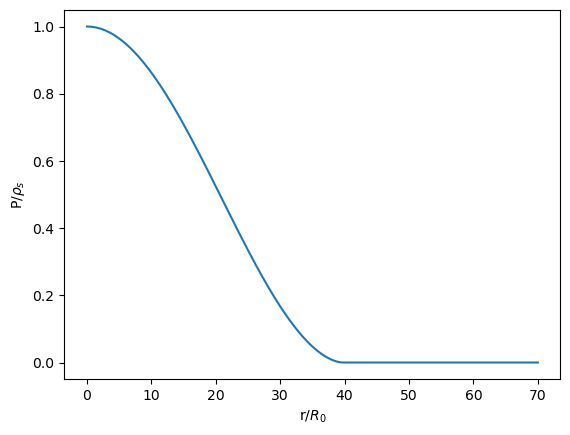

In [11]:
plt.plot(r,P)
plt.xlabel(r'r/$R_0$')
plt.ylabel(r'P/$\rho_s$')
plt.show()

The pressure is maximum at the center of the star ($P = \rho_s$) and goes to zero at the surface of the star.

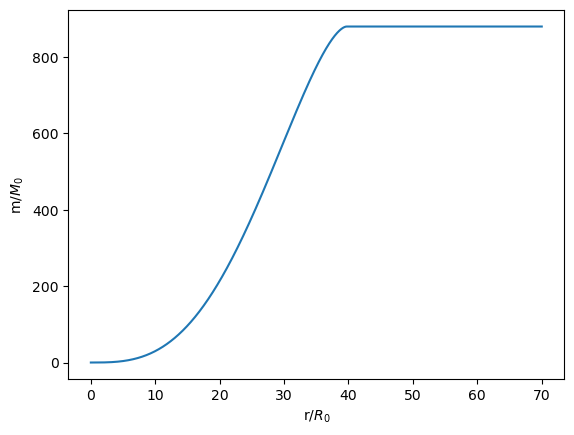

In [12]:
plt.plot(r,m)
plt.xlabel(r'r/$R_0$')
plt.ylabel(r'm/$M_0$')
plt.show()

The mass $m(r)$ starts at zero at the center of the star and it increases up to the total mass of the star on the surface $m(r = R)$.

In [37]:
max(m)

880.1694564067352

This corresponds to the predicted mass of the star in units of $M_0$.

In [40]:
max(m)*M0

4657.725006210544

This is the total mass of the star in units of solar masses $M_{\odot}$.

In [74]:
r[np.argmin(P)]

39.70134200371587

This is the best estimate of the star's radius in units of $R_0$, it is roughly $40 \ R_0$.

In [75]:
r[np.argmin(P)]*R0

30.864392589972056

This is the best estimate of the star's radius in units of 10 km, so it is roughly 308 km.

In [13]:
rk4(r, deriv_tov, y2, dr, rho_s=rho_s)

In [14]:
#y2

In [15]:
P_rel = y2.transpose()[0]
m_rel = y2.transpose()[1]

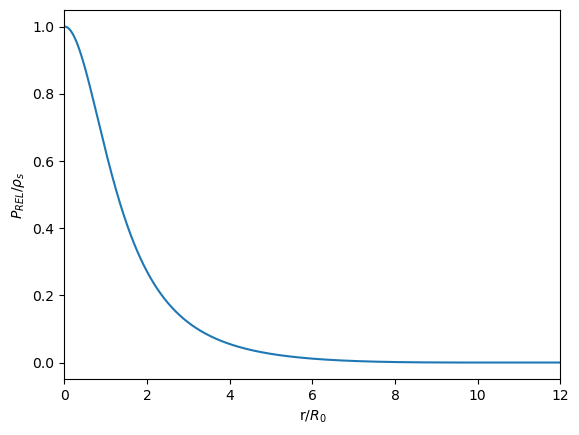

In [16]:
plt.plot(r,P_rel)
plt.xlabel(r'r/$R_0$')
plt.ylabel(r'$P_{REL}$/$\rho_s$')
plt.xlim(0,12)
plt.show()

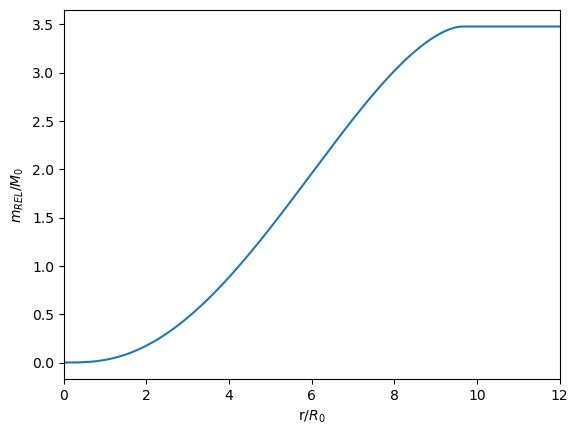

In [17]:
plt.plot(r,m_rel)
plt.xlabel(r'r/$R_0$')
plt.ylabel(r'$m_{REL}$/$M_0$')
plt.xlim(0,12)
plt.show()

In [46]:
max(m_rel)

3.4761792799734805

In [47]:
max(m_rel)*M0

18.395420382460284

In [52]:
r[np.argmin(P_rel)]

9.63274974989281

In [53]:
r[np.argmin(P_rel)]*R0

7.488637788964916

Taking into account general relativity, the estimated radius of the neutron star is now much shorter at roughly $10 \ R_0$, so at roughly 75 km

We can note that the mass is almost 200 times smaller in the TOV prediction than in the non relativistic one. This is due to the fact that in TOV the pressure contributes to the gravitational field making it harder for the star to support its own weight, this leads to more compact lower mass configurations. Pressure adds to gravity so massive stars collapse instead of growing stably.

## Variation of $\rho_s$

In [69]:
y3 = np.zeros([N,2])
y4 = np.zeros([N,2])
# Pressure at r=0 is rho_s and the mass at r=0 is zero
y3[0][0] = 1
y4[0][0] = 1

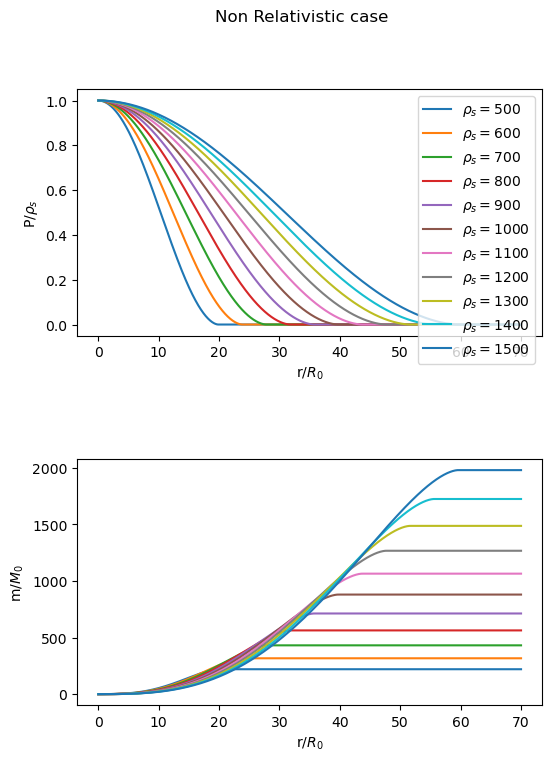

In [88]:
rho_s_list = np.arange(500, 1600, 100)
radii = []
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6, 8))
plt.suptitle('Non Relativistic case')
fig.subplots_adjust(hspace=0.5)
ax1.set_xlabel(r'r/$R_0$')
ax1.set_ylabel(r'P/$\rho_s$')
ax2.set_xlabel(r'r/$R_0$')
ax2.set_ylabel(r'm/$M_0$')
for rho_s in rho_s_list:
    rk4(r, deriv, y3, dr, rho_s=rho_s)
    radii.append(r[np.argmin(np.transpose(y3)[0])])
    ax1.plot(r, np.transpose(y3)[0], label = r'$\rho_{s}=$%s'% rho_s)
    ax2.plot(r, np.transpose(y3)[1], label = r'$\rho_{s}=$%s'% rho_s)
ax1.legend()
#ax2.legend()
plt.show()

In [93]:
#radii

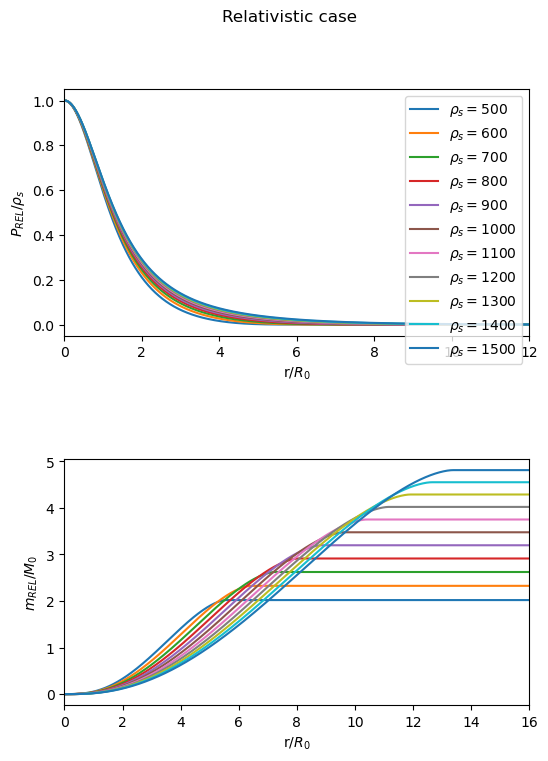

In [90]:
radii2 = []
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6, 8))
fig.subplots_adjust(hspace=0.5)
plt.suptitle('Relativistic case')
ax1.set_xlabel(r'r/$R_0$')
ax1.set_ylabel(r'$P_{REL}$/$\rho_s$')
ax1.set_xlim(0,12)

ax2.set_xlabel(r'r/$R_0$')
ax2.set_ylabel(r'$m_{REL}$/$M_0$')
ax2.set_xlim(0,16)

for rho_s in rho_s_list:
    rk4(r, deriv_tov, y4, dr, rho_s=rho_s)
    radii2.append(r[np.argmin(np.transpose(y4)[0])])
    ax1.plot(r, np.transpose(y4)[0], label = r'$\rho_{s}=$%s'% rho_s)
    ax2.plot(r, np.transpose(y4)[1], label = r'$\rho_{s}=$%s'% rho_s)
ax1.legend()
#ax2.legend()
plt.show()

In [94]:
#radii2 

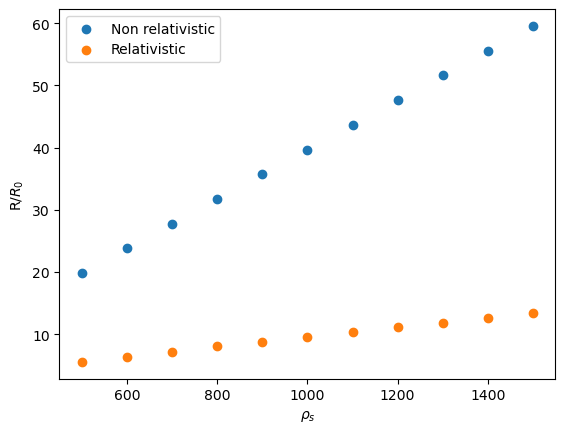

In [95]:
plt.figure()
plt.scatter(rho_s_list, radii, label = 'Non relativistic')
plt.scatter(rho_s_list, radii2, label = 'Relativistic')
plt.ylabel(r'R/$R_0$')
plt.xlabel(r'$\rho_s$')
plt.legend()
plt.show()

The total radius of the star increases boundlessly in the non relativistic case, while it's much smaller in the relativistic case. **Relativiy limits how massive a neutron star can be and it limits their radii**.